In [25]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [26]:
data=pd.read_csv('JC-201810-citibike-tripdata.csv')

In [27]:
data_1=pd.read_csv('201810-citibike-tripdata.csv')

In [28]:
data_1.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1


In [29]:
data_1['start']=pd.to_datetime(data_1['starttime'])
data_1['stop']=pd.to_datetime(data_1['starttime'])

In [32]:
#heatmap
data_08=data_1.loc[data_1['start'].dt.day==8]
data_early=data_08.loc[data_08['start'].dt.hour<10 ]
data_early=data_early.loc[data_early['start'].dt.hour>6 ]
#rush hour
def my_test(a, b):
    return str(a)+','+str(b)
#combine latitude and longitude
def getLocation(s):
    s=s.strip().split(',')
    s=[float(ii) for ii in s]
    return s
data_early['location'] = data_early.apply(lambda row: my_test(row['start station latitude'], row['start station longitude']), axis=1)
location=list(data_early['location'].value_counts().index)
location=[getLocation(i) for i in location]
locationCount=list(data_early['location'].value_counts())
loc=[]
for i in range(len(location)):
    #print(location[i][1])
    loc.append({"lng":location[i][1],"lat":location[i][0],"count":locationCount[i]})
loc

[{'lng': -73.97770600000001, 'lat': 40.751872999999996, 'count': 147},
 {'lng': -73.9946848154068, 'lat': 40.7505853470215, 'count': 97},
 {'lng': -73.99379968643187, 'lat': 40.75898481399634, 'count': 93},
 {'lng': -74.00277668, 'lat': 40.76087502, 'count': 83},
 {'lng': -73.98142006, 'lat': 40.72740794, 'count': 79},
 {'lng': -73.97791, 'lat': 40.751581, 'count': 71},
 {'lng': -73.98165557, 'lat': 40.73221853, 'count': 70},
 {'lng': -74.00674436, 'lat': 40.73172428, 'count': 70},
 {'lng': -74.001384973526, 'lat': 40.74102150900266, 'count': 70},
 {'lng': -73.98452728986742, 'lat': 40.76068327096592, 'count': 69},
 {'lng': -73.98658032, 'lat': 40.75513557, 'count': 64},
 {'lng': -73.98379855, 'lat': 40.72621788, 'count': 64},
 {'lng': -73.99138152, 'lat': 40.75466591, 'count': 63},
 {'lng': -74.00711384, 'lat': 40.73291553, 'count': 62},
 {'lng': -73.99075269699097, 'lat': 40.729514962249496, 'count': 62},
 {'lng': -73.98194829, 'lat': 40.745712100000006, 'count': 61},
 {'lng': -73.99

In [33]:
#heatmap
data_08=data_1.loc[data_1['start'].dt.day==8]
data_early=data_08.loc[data_08['start'].dt.hour<22 ]
data_early=data_early.loc[data_early['start'].dt.hour>17 ]
#rush hour
def my_test(a, b):
    return str(a)+','+str(b)
def getLocation(s):
    s=s.strip().split(',')
    s=[float(ii) for ii in s]
    return s
data_early['location'] = data_early.apply(lambda row: my_test(row['start station latitude'], row['start station longitude']), axis=1)
location=list(data_early['location'].value_counts().index)
location=[getLocation(i) for i in location]
locationCount=list(data_early['location'].value_counts())
loc=[]
for i in range(len(location)):
    #print(location[i][1])
    loc.append({"lng":location[i][1],"lat":location[i][0],"count":locationCount[i]})
loc

[{'lng': -73.98955109, 'lat': 40.740343200000005, 'count': 154},
 {'lng': -73.97770600000001, 'lat': 40.751872999999996, 'count': 145},
 {'lng': -73.9900262, 'lat': 40.75640548, 'count': 130},
 {'lng': -73.99415556, 'lat': 40.74173969, 'count': 110},
 {'lng': -73.99200509, 'lat': 40.73492695, 'count': 106},
 {'lng': -73.99093085, 'lat': 40.75019995, 'count': 102},
 {'lng': -73.99074142, 'lat': 40.73454567, 'count': 100},
 {'lng': -73.993934, 'lat': 40.751551, 'count': 94},
 {'lng': -74.01322069, 'lat': 40.71754834, 'count': 93},
 {'lng': -74.007756, 'lat': 40.746745000000004, 'count': 92},
 {'lng': -73.99138152, 'lat': 40.75466591, 'count': 88},
 {'lng': -73.99075269699097, 'lat': 40.729514962249496, 'count': 87},
 {'lng': -74.00214988, 'lat': 40.73038599, 'count': 86},
 {'lng': -73.99102628231049, 'lat': 40.73020660529954, 'count': 86},
 {'lng': -73.99906065, 'lat': 40.73047747, 'count': 84},
 {'lng': -74.008119, 'lat': 40.739323, 'count': 83},
 {'lng': -73.99931783, 'lat': 40.7393554

In [34]:
data_1['day']=data_1['start'].dt.day
data_1['hour']=data_1['start'].dt.hour

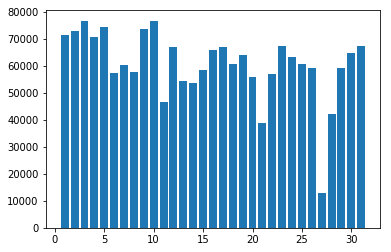

3     76757
10    76756
5     74515
9     73713
2     73110
1     71378
4     70657
31    67488
23    67210
12    67009
17    66902
16    65751
30    64653
19    63988
24    63306
18    60825
25    60762
7     60525
29    59205
26    59134
15    58399
8     57889
6     57311
22    57111
20    55763
13    54328
14    53824
11    46530
28    42098
21    38760
27    13000
Name: day, dtype: int64

In [35]:
dayCount=data_1['day'].value_counts()
day=data_1['day'].value_counts().index
plt.bar(day,dayCount)
plt.show()
data_1['day'].value_counts()

Figure1: Number of trips distribution on October 

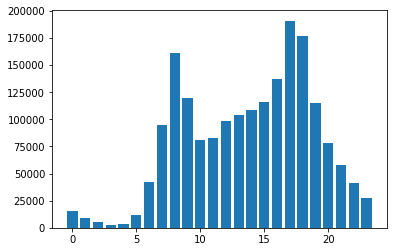

In [36]:
data_08=data_1.loc[data_1['day']==10]
hourCount=data_1['hour'].value_counts()
hour=data_1['hour'].value_counts().index
plt.bar(hour,hourCount)
plt.show()
#hourCount

Figure 2: Number of trips distribution on Oct 10th.

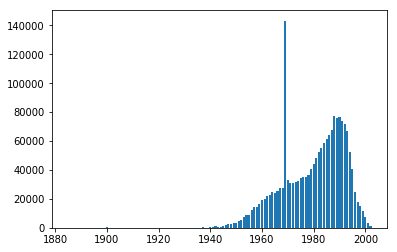

In [37]:
birthCount=data_1['birth year'].value_counts()
birth=data_1['birth year'].value_counts().index
plt.bar(birth,birthCount)
plt.show()

Figure3: The birth year of users distribution on Oct 10th

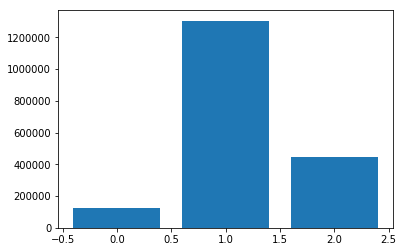

In [19]:
birthCount=data_1['gender'].value_counts()
birth=data_1['gender'].value_counts().index
plt.bar(birth,birthCount)
plt.show()

Figure4: The gender of users distribution on Oct 10th. The female users take the most part.

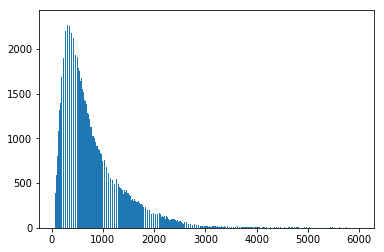

In [20]:
data_1['tripduration_10']=data_1['tripduration']
data_10=data_1.loc[data_1['tripduration_10']<6000]
birthCount=data_10['tripduration_10'].value_counts()
birth=data_10['tripduration_10'].value_counts().index
plt.bar(birth,birthCount)
plt.show()

Figure5: The distance of users distribution(<6000)

In [21]:
data_08=data_1.loc[data_1['start'].dt.day==8]
data_early=data_08.loc[data_08['start'].dt.hour<10 ]
data_early=data_early.loc[data_early['start'].dt.hour>6 ]

def my_test(a, b):
    return str(a)+','+str(b)
def getLocation(s):
    s=s.strip().split(',')
    s=[float(ii) for ii in s]
    return s
data_early['location'] = data_early.apply(lambda row: my_test(row['end station latitude'], row['end station longitude']), axis=1)
location=list(data_early['location'].value_counts().index)
location=[getLocation(i) for i in location]
locationCount=list(data_early['location'].value_counts())
loc=[]
for i in range(len(location)):
    #print(location[i][1])
    loc.append({"lng":location[i][1],"lat":location[i][0],"count":locationCount[i]})
loc

[{'lng': -73.97770600000001, 'lat': 40.751872999999996, 'count': 142},
 {'lng': -73.98955109, 'lat': 40.740343200000005, 'count': 141},
 {'lng': -73.97498696, 'lat': 40.75510267, 'count': 126},
 {'lng': -73.97648516, 'lat': 40.75992262, 'count': 106},
 {'lng': -73.98602213, 'lat': 40.74096374, 'count': 96},
 {'lng': -74.00566443, 'lat': 40.72243797, 'count': 94},
 {'lng': -74.001384973526, 'lat': 40.74102150900266, 'count': 89},
 {'lng': -73.99009296, 'lat': 40.73704984, 'count': 88},
 {'lng': -74.01322069, 'lat': 40.71754834, 'count': 87},
 {'lng': -73.97371465, 'lat': 40.764397100000004, 'count': 84},
 {'lng': -73.97982001304626, 'lat': 40.76132983124814, 'count': 84},
 {'lng': -73.97791, 'lat': 40.751581, 'count': 84},
 {'lng': -73.99415556, 'lat': 40.74173969, 'count': 79},
 {'lng': -73.99456405, 'lat': 40.73971301, 'count': 78},
 {'lng': -73.98658032, 'lat': 40.75513557, 'count': 78},
 {'lng': -73.98855723, 'lat': 40.7462009, 'count': 77},
 {'lng': -73.97992193698882, 'lat': 40.75

In [22]:
data_08=data_1.loc[data_1['start'].dt.day==8]
data_early=data_08.loc[data_08['start'].dt.hour<10 ]
data_early=data_early.loc[data_early['start'].dt.hour>6 ]

def my_test(a, b):
    return str(a)+','+str(b)
def getLocation(s):
    s=s.strip().split(',')
    s=[float(ii) for ii in s]
    return s
data_early['location'] = data_early.apply(lambda row: my_test(row['end station latitude'], row['end station longitude']), axis=1)
location=list(data_early['location'].value_counts().index)
location=[getLocation(i) for i in location]
locationCount=list(data_early['location'].value_counts())
loc=[]
for i in range(len(location)):
    #print(location[i][1])
    loc.append({"lng":location[i][1],"lat":location[i][0],"count":locationCount[i]})
loc

[{'lng': -73.97770600000001, 'lat': 40.751872999999996, 'count': 142},
 {'lng': -73.98955109, 'lat': 40.740343200000005, 'count': 141},
 {'lng': -73.97498696, 'lat': 40.75510267, 'count': 126},
 {'lng': -73.97648516, 'lat': 40.75992262, 'count': 106},
 {'lng': -73.98602213, 'lat': 40.74096374, 'count': 96},
 {'lng': -74.00566443, 'lat': 40.72243797, 'count': 94},
 {'lng': -74.001384973526, 'lat': 40.74102150900266, 'count': 89},
 {'lng': -73.99009296, 'lat': 40.73704984, 'count': 88},
 {'lng': -74.01322069, 'lat': 40.71754834, 'count': 87},
 {'lng': -73.97371465, 'lat': 40.764397100000004, 'count': 84},
 {'lng': -73.97982001304626, 'lat': 40.76132983124814, 'count': 84},
 {'lng': -73.97791, 'lat': 40.751581, 'count': 84},
 {'lng': -73.99415556, 'lat': 40.74173969, 'count': 79},
 {'lng': -73.99456405, 'lat': 40.73971301, 'count': 78},
 {'lng': -73.98658032, 'lat': 40.75513557, 'count': 78},
 {'lng': -73.98855723, 'lat': 40.7462009, 'count': 77},
 {'lng': -73.97992193698882, 'lat': 40.75